In [35]:
import numpy as np
import numpy.linalg as alg
import pandas as pd
import matplotlib.pyplot as plt

### Load the Data

In [36]:
p = 452
n = 1258
R = 1000

df = pd.read_csv('snp452-data.csv')
df.head(6)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D443,D444,D445,D446,D447,D448,D449,D450,D451,D452
0,126.75,30.51,40.05,21.75,25.60,7.01,3.24,42.04,31.59,19.14,...,25.65,13.50,11.35,8.16,22.03,80.23,17.60,25.12,40.30,40.64
1,126.27,30.69,40.44,21.34,26.30,6.94,3.45,42.33,31.60,19.05,...,25.59,13.40,11.54,8.28,22.94,80.70,18.10,24.55,40.40,40.27
2,127.19,31.97,40.70,22.11,27.51,7.16,3.45,42.75,32.00,19.96,...,26.48,13.29,12.25,8.44,24.24,82.97,18.94,24.99,40.66,41.39
3,127.07,31.78,38.87,22.07,28.51,7.17,3.37,42.18,31.73,19.78,...,26.05,13.31,11.80,8.31,25.45,82.51,19.15,25.15,40.26,41.59
4,125.70,31.17,39.85,22.40,27.13,6.69,3.35,42.23,31.80,18.82,...,26.11,13.02,12.60,8.27,24.71,81.47,18.75,25.27,40.00,42.03
5,127.69,31.87,39.98,26.03,28.24,6.91,3.49,43.03,32.20,19.57,...,25.91,13.00,12.42,8.38,25.47,83.42,19.44,25.04,40.25,42.79


In [37]:
X = np.asarray(df)
X = X.T
print("Now the shape of X is {}".format(X.shape))


Now the shape of X is (452, 1258)


### A. Take the log price

In [38]:
Y = np.log(X)

### B. Compute the log price jump

In [39]:
dY = np.diff(Y, axis = 1)
print("The shape of Y after differentiating is {}".format(dY.shape))
p, n = dY.shape

The shape of Y after differentiating is (452, 1257)


### C. construct the realized covatiance matrix S

In [40]:
S = np.cov(dY)
S.shape

(452, 452)

### D. Compute the eigenvalues of S and store them in a descendign order

In [41]:
eigen_values, eigen_vectors = alg.eig(S)
eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda eigen_pairs: eigen_pairs[0], reverse=True)

### H. Horn's Parallel Analysis

In [42]:
"""
Args:
    N: is an array to count
    N[k]: counts the number of events where Sr's k-th biggest eigenvalue > S's k-th biggest eigenvalue
    Sr: A permutated random matrix
    r : the index for permutation experiments
    R : the total number of permutation experiments
"""
N = np.zeros(p)

for r in range(R):
    Sr = np.zeros(shape=(p, p))
    # Create a permutated Sr
    for i in range(p):
        permu = np.random.permutation(p)
        Sr[i, :] = S[i, permu]
    # Find the eigenvalues and eigenvectors of Sr
    Sr_eigen_values, Sr_eigen_vectors = alg.eig(Sr)
    Sr_eigen_pairs = [(Sr_eigen_values[j], Sr_eigen_vectors[:, j]) for j in range(len(Sr_eigen_values))]
    # Sort the eigen_pairs of Sr
    Sr_eigen_pairs.sort(key=lambda Sr_eigen_pairs: Sr_eigen_pairs[0],
                       reverse=True)
    # Update Nk over the new Sr_eigen_values
    for k in range(p):
        if eigen_values[k] < Sr_eigen_values[k]:
            N[k] += 1

### Calculate the p-value for all eigenvalues of S and visualize them

In [43]:
P_values = [(N[k]+1)/(R+1) for k in range(p)]

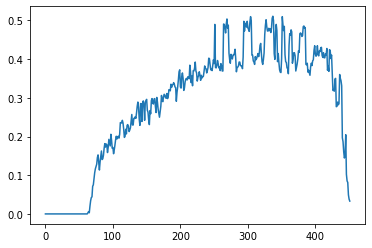

In [44]:
plt.plot(P_values)
plt.show()

### Find the first doubtful eigenvalue

In [45]:
for k in range(p):
    if N[k] > 0:
        print("The first eigenvalue that has bigger competitor from Sr's is the {}-th\n its value is {} with p-value {} ".format(k, N[k], P_values[k]))
        break

The first eigenvalue that has bigger competitor from Sr's is the 63-th
 its value is 3.0 with p-value 0.003996003996003996 


Thus, we have evidence to believe PCA can be conducted to this dataset efficiently and effectively. 